## 📈 Stock Price Prediction using LSTM
A time-series forecasting example using LSTM neural networks to predict stock prices from Yahoo Finance data.

In [1]:
# Step 1: Install Required Packages
%pip install yfinance numpy pandas matplotlib scikit-learn tensorflow

  Using cached numpy-2.3.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.3.0-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scikit_learn-1.7.0-cp312-cp312-win_amd64.whl.metadata (14 kB)
  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 932.9 kB/s eta 0:00:03
     ------ --------------------------------- 0.5/3.0 MB 932.9 kB/s eta 0:00:03
     ---------- ----------------------------- 0.8/3.0 MB 932.9 kB/s eta 0:00:03
     ------------- --------------------------

In [2]:
# Step 2: Import Libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [7]:
# Step 3: Load Historical Stock Data
import yfinance as yf

ticker = 'AAPL'  # You can change this to any stock symbol (e.g., 'GOOGL', 'MSFT', 'RELIANCE.NS')
df = yf.download(ticker, start='2015-01-01', end='2023-12-31')

# View the first few rows to confirm
df.head()


C:\Users\satya\AppData\Local\Temp\ipykernel_13912\942327941.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2015-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288580,24.757334,23.848706,24.746226,212818400
2015-01-05,23.604338,24.137518,23.417725,24.057541,257142000
2015-01-06,23.606556,23.866481,23.244437,23.668760,263188400
2015-01-07,23.937569,24.037539,23.704302,23.815381,160423600
2015-01-08,24.857307,24.915069,24.148621,24.266367,237458000


In [8]:
# Step 4: Normalize and Prepare Data
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = df[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i + time_step, 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (2204, 60, 1), y shape: (2204,)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 5: Build and Train the LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50),
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, y, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0564
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.3294e-04
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.0758e-04
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.3897e-04
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.1922e-04
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.1673e-04
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.3934e-04
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.9664e-04
Epoch 9/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.3226e-04
Epoch 10/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.5880e-04
Epoch 11/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.5251e-04
Epoch 12/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.1292e-04
Epoch 13/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.6870e-04
Epoch 14/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.3577e-04
Epoch 15/50
69/69 ━

In [12]:
# Step 6: Predict and Inverse Transform Results
predictions = model.predict(X)
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))

69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


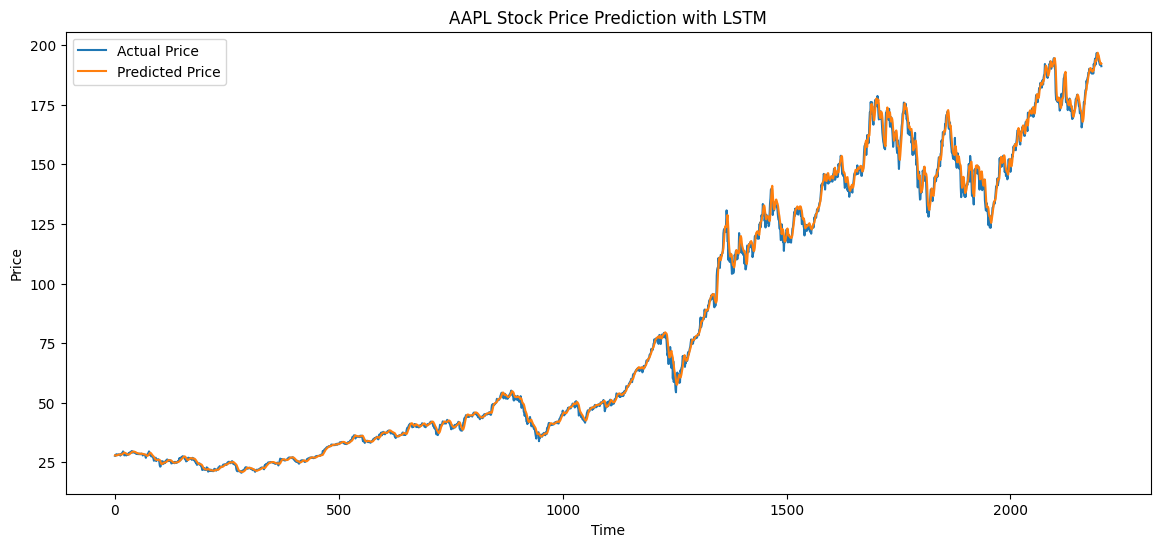

In [14]:
import matplotlib.pyplot as plt

# Step 7: Plot Actual vs Predicted Prices
plt.figure(figsize=(14, 6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title(f'{ticker} Stock Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
